<a href="https://colab.research.google.com/github/hackcoderr/heart-diseases-predictor/blob/master/ml/heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Pandas and Numpy**

In [ ]:
import pandas as pd
import numpy as np

**Loading Heart CSV DataSet**

In [ ]:
data = pd.read_csv("/content/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Selectiing Features Base On Heat Map and Using Correlation Method**

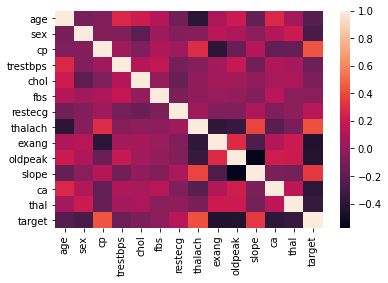

In [ ]:
import seaborn as sns
sns.heatmap(data.corr())

**Selecting Features "'age', 'trestbps', 'chol', 'thalach', 'oldpeak'" in x variable**

In [ ]:
x = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

**Doing OneHotEncoding using get_dummies to avoid Multi Collinearity**

In [ ]:
sex = pd.get_dummies(data['sex'], drop_first=True)
cp = pd.get_dummies(data['cp'], drop_first=True)
fbs = pd.get_dummies(data['fbs'], drop_first=True)
restecg = pd.get_dummies(data['restecg'], drop_first=True)
exang = pd.get_dummies(data['exang'], drop_first=True)
slope = pd.get_dummies(data['slope'], drop_first=True)
ca = pd.get_dummies(data['ca'], drop_first=True)
thal = pd.get_dummies(data['thal'], drop_first=True)

**Concating x and the OneHotEncoded values into X variable**

In [ ]:
X = pd.concat([x, sex, cp, fbs, restecg, exang, slope, ca, thal ], axis=1)
X

,age,trestbps,chol,thalach,oldpeak,1,1,2,3,1,1,2,1,1,2,1,2,3,4,1,2,3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1


**Adding 'target' features in y variable**

In [ ]:
y=data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

**Spliting Data into training and testing part**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=40)

**Using `LogisticRegression` Algorithm for training the model and predicting**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_model= lr_model.predict(X_test)
lr_y_model
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy: ", accuracy_score(y_test, lr_y_model))

Logistic Regression Accuracy:  0.9180327868852459


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Using `RandomForestClassifier` Algorithm for training the model and predicting with trees=1000**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=10000, max_depth=100)
rfc_model
rfc_model.fit(X_train, y_train)
rfc_y_pred = rfc_model.predict(X_test)
rfc_y_pred
from sklearn.metrics import accuracy_score
print("Random Forest Accuracy: ", accuracy_score(y_test, rfc_y_pred))

Random Forest Accuracy:  0.7868852459016393


**Visualizing Random Forest Classifier**

[Text(594.4250000000001, 1026.8, 'oldpeak <= 0.7\ngini = 0.5\nsamples = 153\nvalue = [122, 120]'),
 Text(275.90000000000003, 906.0, '2 <= 0.5\ngini = 0.403\nsamples = 71\nvalue = [31, 80]'),
 Text(124.0, 785.2, '1 <= 0.5\ngini = 0.495\nsamples = 25\nvalue = [19, 23]'),
 Text(49.6, 664.4, 'age <= 50.0\ngini = 0.42\nsamples = 18\nvalue = [9, 21]'),
 Text(24.8, 543.6, 'gini = 0.0\nsamples = 4\nvalue = [6, 0]'),
 Text(74.4, 543.6, '2 <= 0.5\ngini = 0.219\nsamples = 14\nvalue = [3, 21]'),
 Text(49.6, 422.79999999999995, 'gini = 0.0\nsamples = 12\nvalue = [0, 21]'),
 Text(99.2, 422.79999999999995, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(198.4, 664.4, 'thalach <= 157.5\ngini = 0.278\nsamples = 7\nvalue = [10, 2]'),
 Text(173.6, 543.6, '1 <= 0.5\ngini = 0.48\nsamples = 2\nvalue = [3, 2]'),
 Text(148.8, 422.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(198.4, 422.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [3, 0]'),
 Text(223.20000000000002, 543.6, 'gini = 0.

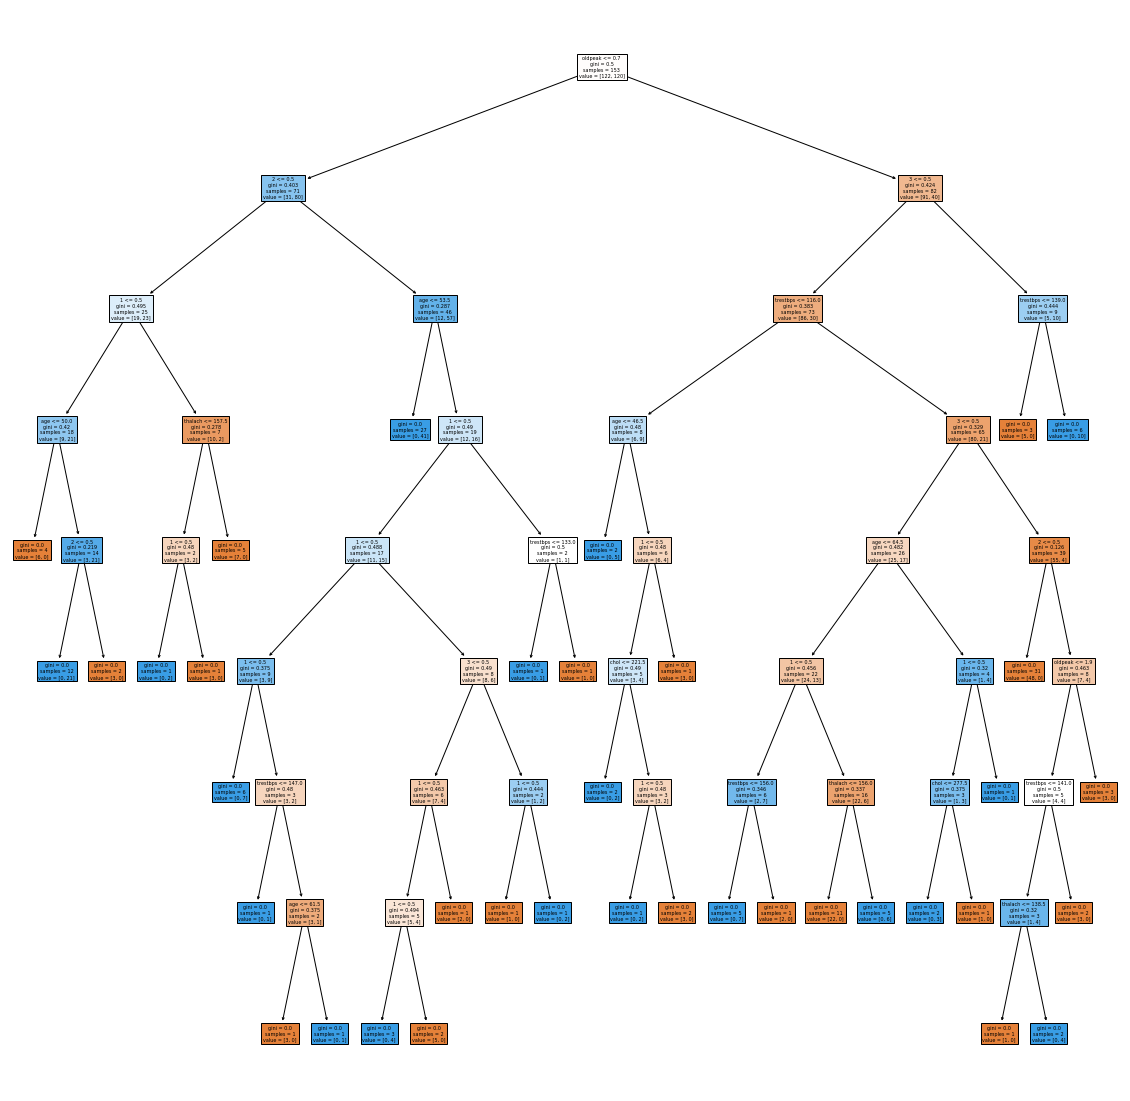

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(rfc_model.estimators_[100], feature_names=X.columns, filled=True)

**Using `DecisionTreeClassifier` Algorithm for training the model and predicting**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred=dt_model.predict(X_test)
dt_y_pred
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy: ", accuracy_score(y_test, dt_y_pred))

Decision Tree Accuracy:  0.6721311475409836


**Visualizing Decision Tree Classifier**

[Text(644.429347826087, 1037.7818181818182, '2 <= 0.5\ngini = 0.497\nsamples = 242\nvalue = [112, 130]'),
 Text(388.17391304347825, 938.9454545454546, 'oldpeak <= 0.7\ngini = 0.382\nsamples = 113\nvalue = [84, 29]'),
 Text(218.3478260869565, 840.1090909090909, 'chol <= 240.5\ngini = 0.498\nsamples = 43\nvalue = [23, 20]'),
 Text(121.30434782608695, 741.2727272727273, '1 <= 0.5\ngini = 0.423\nsamples = 23\nvalue = [7, 16]'),
 Text(72.78260869565217, 642.4363636363637, 'age <= 43.5\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(48.52173913043478, 543.6, '1 <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(24.26086956521739, 444.76363636363635, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(72.78260869565217, 444.76363636363635, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(97.04347826086956, 543.6, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(169.82608695652175, 642.4363636363637, 'trestbps <= 97.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(145.5652

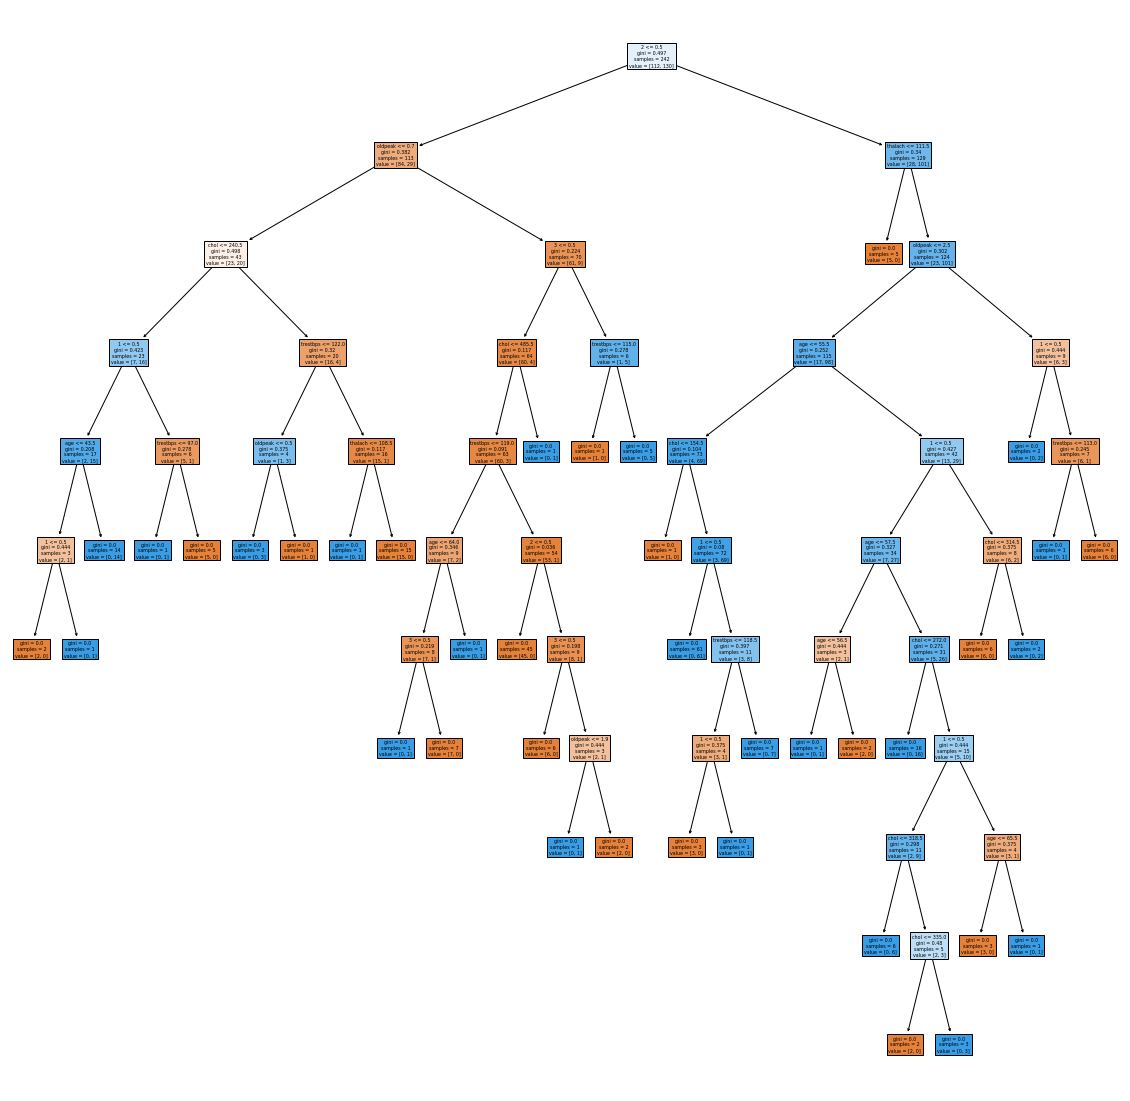

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model, feature_names=X.columns, filled=True)

**Using `GradientBoostingClassifier` Algorithm for training the model and predicting with trees=1000**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(n_estimators=1000)
GB_model.fit(X_train, y_train)
y_pred_GB = GB_model.predict(X_test)
y_pred_GB
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GB)

0.7868852459016393

**Choosing RandomForestClassifier Model and saving it using Joblib**

In [ ]:
import joblib
joblib_file = "RandomForest_Heart_Prediction.h5"  
joblib.dump(lr_model, joblib_file)

['RandomForest_Heart_Prediction.h5']